In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# ─── Define Base Directory ─────────────────────────────────────────────────────
# Set the base path to the directory containing the training data
dict_path = Path("/home/soumodip/Python/MSc_Project/Finalized_Project/Training_data_75k_100GeV")

# ─── Full Jet Dataset Paths ────────────────────────────────────────────────────
# Path to full jet labels (0 for quark, 1 for tau)
full_jet_labels_path = dict_path / "Final_Dataset/Main_Datasets/jet_labels.npy"

# Path to full jet metadata (contains pT, eta, phi, n_charged)
full_jet_metadata_path = dict_path / "Final_Dataset/Main_Datasets/jet_metadata.npz"

# ─── Core Jet Dataset Paths ────────────────────────────────────────────────────
# Path to core jet labels (same format as full jets)
core_jet_labels_path = dict_path / "Final_Dataset/Core_Datasets/core_jet_labels.npy"

# Path to core jet metadata (contains core_pt_ratio and core_charged_ratio)
core_jet_metadata_path = dict_path / "Final_Dataset/Core_Datasets/core_jet_metadata.npz"

# ─── Output Path for Plots ─────────────────────────────────────────────────────
# Directory to save all kinematic distribution plots
kinematics_plots_path = dict_path / "Kinematics_Analysis"

In [3]:
# ─── Load Full Jet Data ─────────────────────────────────────────────────────────
# Load full jet labels (0 = quark jet, 1 = tau jet)
full_labels = np.load(full_jet_labels_path)

# Load full jet metadata from compressed .npz file
full_meta = np.load(full_jet_metadata_path)

# Extract kinematic features: transverse momentum, pseudorapidity, azimuthal angle, and charged multiplicity
full_pt = full_meta["pt"]
full_eta = full_meta["eta"]
full_phi = full_meta["phi"]
full_ncharged = full_meta["n_charged"]

# ─── Load Core Jet Data ─────────────────────────────────────────────────────────
# Load core jet labels (same format: 0 = quark, 1 = tau)
core_labels = np.load(core_jet_labels_path)

# Load core jet metadata from .npz file
core_meta = np.load(core_jet_metadata_path)

# Extract core pT ratio (core pT / full pT) and core charged multiplicity ratio
core_pt_ratios = core_meta["core_pt_ratio"]
core_charged_ratios = core_meta["core_charged_ratio"]

In [4]:
# ─── Split Full Jet Features by Class ────────────────────────────────────────────
# Separate full jet transverse momenta for quark and tau jets
full_pt_quark = full_pt[full_labels == 0]
full_pt_tau   = full_pt[full_labels == 1]

# Separate full jet pseudorapidities (η) for quark and tau jets
full_eta_quark = full_eta[full_labels == 0]
full_eta_tau   = full_eta[full_labels == 1]

# Separate full jet azimuthal angles (ϕ) for quark and tau jets
full_phi_quark = full_phi[full_labels == 0]
full_phi_tau   = full_phi[full_labels == 1]

# Separate full jet charged multiplicities for quark and tau jets
full_ncharged_quark = full_ncharged[full_labels == 0]
full_ncharged_tau   = full_ncharged[full_labels == 1]

# ─── Split Core Jet Metadata Ratios by Class ─────────────────────────────────────
# Separate core-to-full pT ratios for quark and tau jets
pTratios_quark = core_pt_ratios[core_labels == 0]
pTratios_tau   = core_pt_ratios[core_labels == 1]

# Separate core-to-full charged multiplicity ratios for quark and tau jets
charged_ratios_quark = core_charged_ratios[core_labels == 0]
charged_ratios_tau   = core_charged_ratios[core_labels == 1]

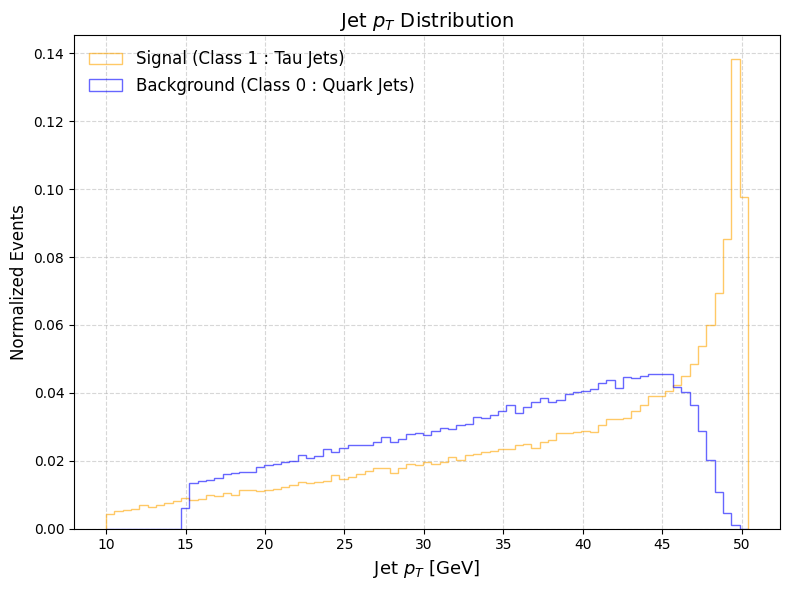

In [5]:
plt.figure(figsize=(8, 6))

# Determine optimal bin edges using Freedman–Diaconis rule based on full dataset
bins = np.histogram_bin_edges(full_pt, bins='fd')

plt.hist(full_pt_tau, bins=bins, alpha=0.6, label='Signal (Class 1 : Tau Jets)', color='orange', density=True, histtype='step')
plt.hist(full_pt_quark, bins=bins, alpha=0.6, label='Background (Class 0 : Quark Jets)', color='blue', density=True, histtype='step')

plt.xlabel(r'Jet $p_T$ [GeV]', fontsize=13)
plt.ylabel('Normalized Events', fontsize=12)
plt.title(r'Jet $p_T$ Distribution', fontsize=14)
plt.legend(loc = 'best', fontsize=12, frameon = False)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.savefig(kinematics_plots_path / "jet_pT_distribution.png", dpi=300)
plt.show()

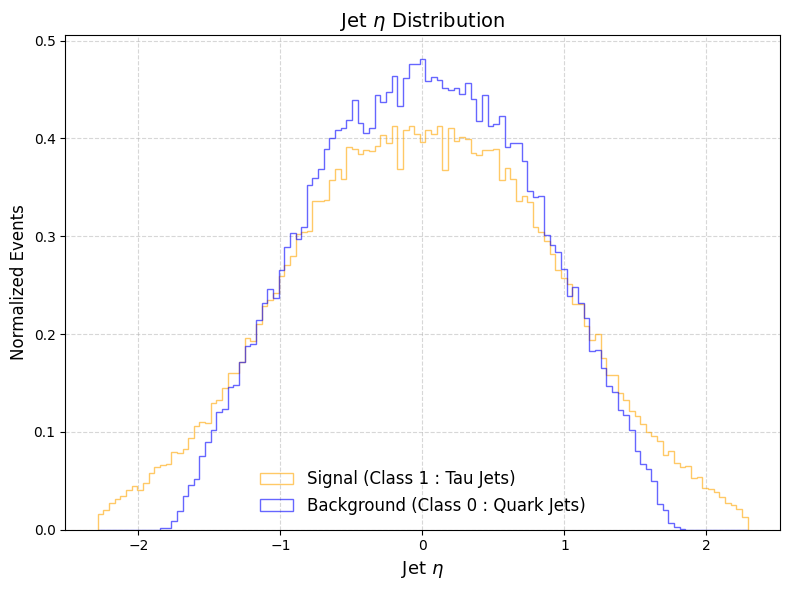

In [6]:
plt.figure(figsize=(8, 6))
eta_bins = np.histogram_bin_edges(full_eta, bins='fd')

plt.hist(full_eta_tau, bins=eta_bins, alpha=0.6, label='Signal (Class 1 : Tau Jets)', color='orange', density=True, histtype='step')
plt.hist(full_eta_quark, bins=eta_bins, alpha=0.6, label='Background (Class 0 : Quark Jets)', color='blue', density=True, histtype='step')

plt.xlabel(r'Jet $\eta$', fontsize=13)
plt.ylabel('Normalized Events', fontsize=12)
plt.title(r'Jet $\eta$ Distribution', fontsize=14)
plt.legend(loc = 'best', fontsize=12, frameon = False)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.savefig(kinematics_plots_path / "jet_eta_distribution.png", dpi=300)
plt.show()

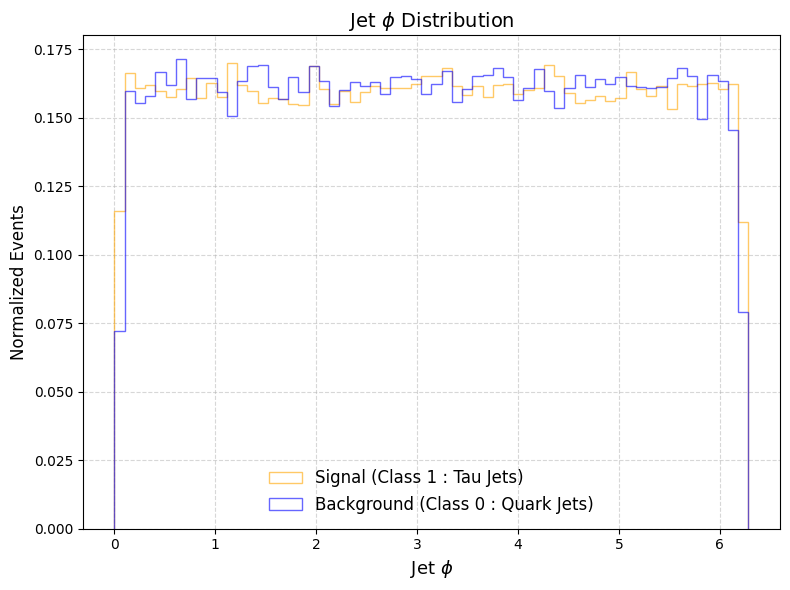

In [7]:
plt.figure(figsize=(8, 6))
phi_bins = np.histogram_bin_edges(full_phi, bins='fd')

plt.hist(full_phi_tau, bins=phi_bins, alpha=0.6, label='Signal (Class 1 : Tau Jets)', color='orange', density=True, histtype='step')
plt.hist(full_phi_quark, bins=phi_bins, alpha=0.6, label='Background (Class 0 : Quark Jets)', color='blue', density=True, histtype='step')

plt.xlabel(r'Jet $\phi$', fontsize=13)
plt.ylabel('Normalized Events', fontsize=12)
plt.title(r'Jet $\phi$ Distribution', fontsize=14)
plt.legend(loc = 'best', fontsize=12, frameon = False)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.savefig(kinematics_plots_path / "jet_phi_distribution.png", dpi=300)
plt.show()

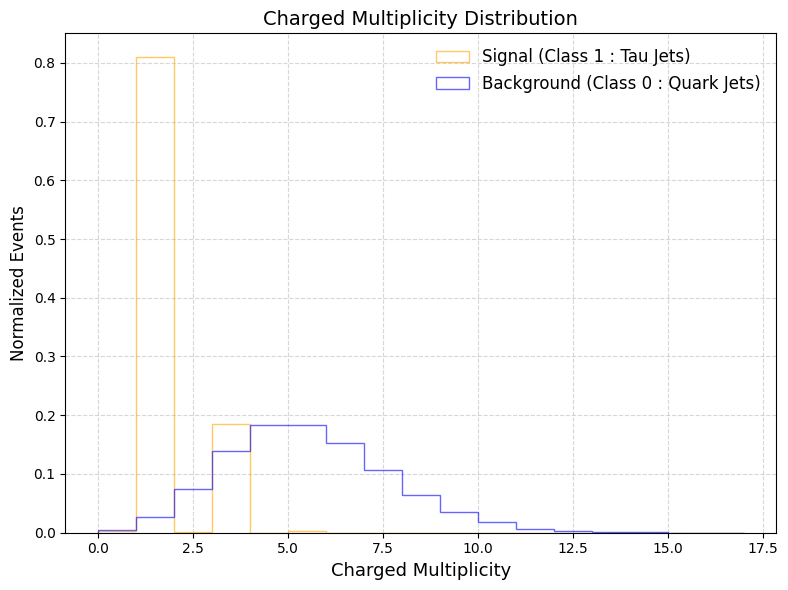

In [8]:
plt.figure(figsize=(8, 6))
bins = np.histogram_bin_edges(full_ncharged, bins='fd')

plt.hist(full_ncharged_tau, bins=bins, alpha=0.6, label='Signal (Class 1 : Tau Jets)', 
         color='orange', density=True, histtype='step')
plt.hist(full_ncharged_quark, bins=bins, alpha=0.6, label='Background (Class 0 : Quark Jets)', 
         color='blue', density=True, histtype='step')

plt.xlabel("Charged Multiplicity", fontsize=13)
plt.ylabel("Normalized Events", fontsize=12)
plt.title("Charged Multiplicity Distribution", fontsize=14)
plt.legend(loc = 'best', fontsize=12, frameon = False)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.savefig(kinematics_plots_path / "charged_multiplicity_distribution.png", dpi=300)
plt.show()


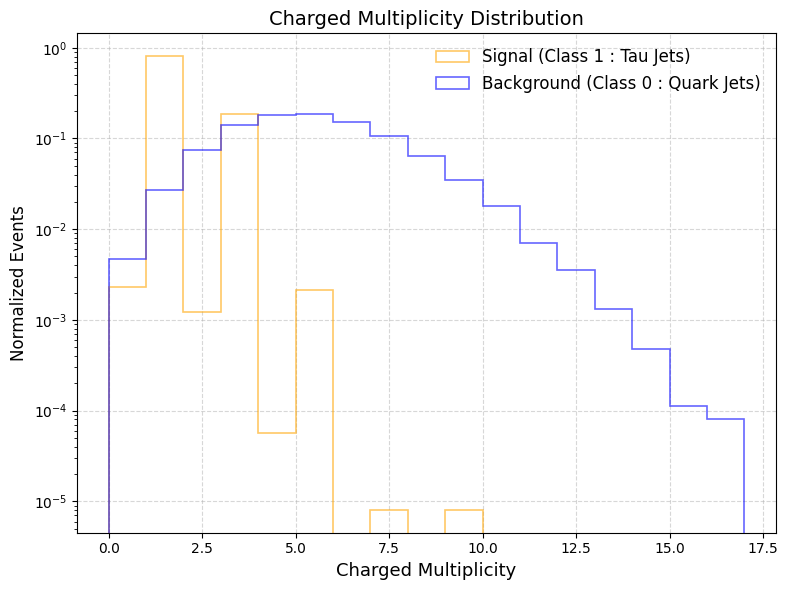

In [9]:
plt.figure(figsize=(8, 6))

plt.hist(full_ncharged_tau, bins=bins, alpha=0.6, label='Signal (Class 1 : Tau Jets)', 
         color='orange', density=True, histtype='step', linewidth=1.2)
plt.hist(full_ncharged_quark, bins=bins, alpha=0.6, label='Background (Class 0 : Quark Jets)', 
         color='blue', density=True, histtype='step', linewidth=1.2)

plt.yscale("log")
plt.xlabel("Charged Multiplicity", fontsize=13)
plt.ylabel("Normalized Events", fontsize=12)
plt.title("Charged Multiplicity Distribution", fontsize=14)
plt.legend(loc = 'best', fontsize=12, frameon = False)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.savefig(kinematics_plots_path / "charged_multiplicity_distribution_log.png", dpi=300)
plt.show()


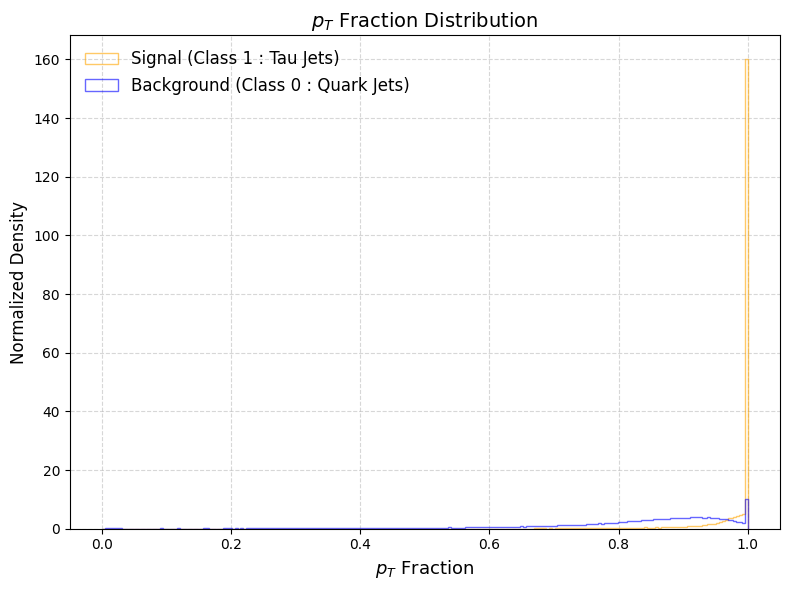

In [10]:
plt.figure(figsize=(8, 6))
ratio_bins = np.histogram_bin_edges(core_pt_ratios, bins='fd')

plt.hist(pTratios_tau, bins=ratio_bins, alpha=0.6, label='Signal (Class 1 : Tau Jets)', color='orange', density=True, histtype='step')
plt.hist(pTratios_quark, bins=ratio_bins, alpha=0.6, label='Background (Class 0 : Quark Jets)', color='blue', density=True, histtype='step')

plt.xlabel(r'$p_T$ Fraction', fontsize=13)
plt.ylabel('Normalized Density', fontsize=12)
plt.title(r'$p_T$ Fraction Distribution', fontsize=14)
plt.legend(loc = 'best', fontsize=12, frameon = False)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.savefig(kinematics_plots_path / "core_pTratio_distribution.png", dpi=300)
plt.show()

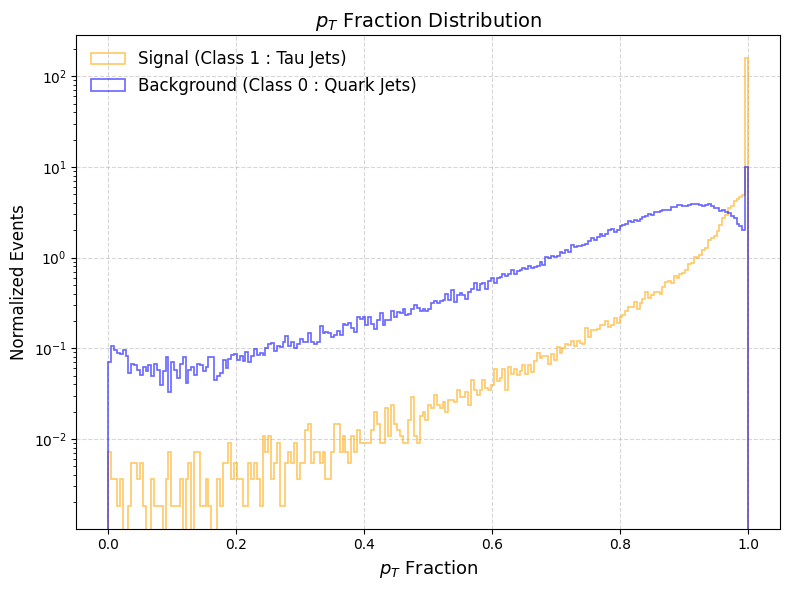

In [11]:
plt.figure(figsize=(8, 6))
bins = np.histogram_bin_edges(core_pt_ratios, bins='fd')

plt.hist(pTratios_tau, bins=bins, alpha=0.6, label='Signal (Class 1 : Tau Jets)', 
         color='orange', density=True, histtype='step', linewidth=1.2)

plt.hist(pTratios_quark, bins=bins, alpha=0.6, label='Background (Class 0 : Quark Jets)', 
         color='blue', density=True, histtype='step', linewidth=1.2)

plt.yscale('log') 
plt.xlabel(r'$p_T$ Fraction', fontsize=13)
plt.ylabel('Normalized Events', fontsize=12)
plt.title(r'$p_T$ Fraction Distribution', fontsize=14)
plt.legend(loc = 'best', fontsize=12, frameon = False)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig(kinematics_plots_path / "core_pTratio_distribution_log.png", dpi=300)
plt.show()

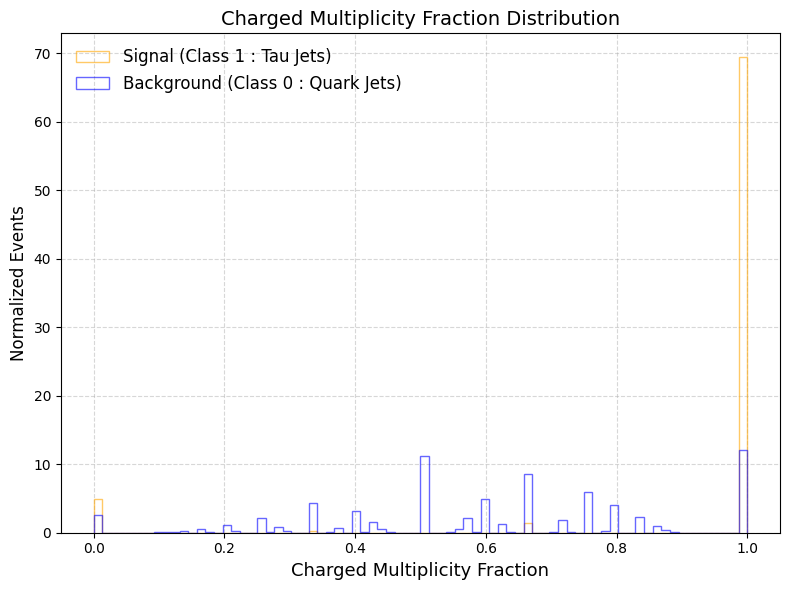

In [12]:
plt.figure(figsize=(8, 6))
ratio_bins = np.histogram_bin_edges(core_charged_ratios, bins='fd')

plt.hist(charged_ratios_tau, bins=ratio_bins, alpha=0.6, label='Signal (Class 1 : Tau Jets)', 
         color='orange', density=True, histtype='step')
plt.hist(charged_ratios_quark, bins=ratio_bins, alpha=0.6, label='Background (Class 0 : Quark Jets)', 
         color='blue', density=True, histtype='step')

plt.xlabel("Charged Multiplicity Fraction", fontsize=13)
plt.ylabel("Normalized Events", fontsize=12)
plt.title("Charged Multiplicity Fraction Distribution", fontsize=14)
plt.legend(loc = 'best', fontsize=12, frameon = False)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.savefig(kinematics_plots_path / "core_charged_ratio_distribution.png", dpi=300)
plt.show()

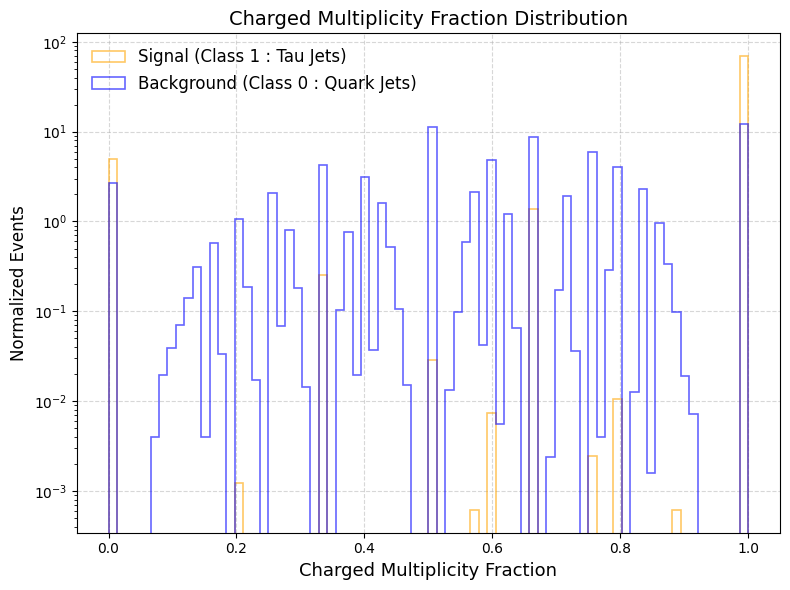

In [13]:
plt.figure(figsize=(8, 6))

plt.hist(charged_ratios_tau, bins=ratio_bins, alpha=0.6, label='Signal (Class 1 : Tau Jets)', 
         color='orange', density=True, histtype='step', linewidth=1.2)
plt.hist(charged_ratios_quark, bins=ratio_bins, alpha=0.6, label='Background (Class 0 : Quark Jets)', 
         color='blue', density=True, histtype='step', linewidth=1.2)

plt.yscale("log")
plt.xlabel("Charged Multiplicity Fraction", fontsize=13)
plt.ylabel("Normalized Events", fontsize=12)
plt.title("Charged Multiplicity Fraction Distribution", fontsize=14)
plt.legend(loc = 'best', fontsize=12, frameon = False)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.savefig(kinematics_plots_path / "core_charged_ratio_distribution_log.png", dpi=300)
plt.show()